In [1]:
# analyze the state increment from DA in FV3
# temporary used for single cycle DA experiment: 06/28/2024
# modified: 2024/08/21 - modify the code for the single-cycle experiments

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
print(cartopy.__version__)

0.21.1


In [2]:
datahome  = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/state_space/increment'

expids = ['ctrl','bc_amsua_1','bc_amsua_2','bc_amsua_3','bc_amsua_4','bc_amsua_5','bc_amsua_15', \
                 'ng_amsua_1','ng_amsua_2','ng_amsua_3','ng_amsua_4','ng_amsua_5','ng_amsua_15', \
                 'bc_atms_17','bc_atms_18','bc_atms_19','bc_atms_20','bc_atms_21','bc_atms_22',  \
                 'ng_atms_17','ng_atms_18','ng_atms_19','ng_atms_20','ng_atms_21','ng_atms_22']

ncfile = []
for exp in expids:
    ncfile.append(os.path.join(datahome,f'atminc_{exp}.nc'))
print(ncfile)

['/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/state_space/increment/atminc_ctrl.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/state_space/increment/atminc_bc_amsua_1.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/state_space/increment/atminc_bc_amsua_2.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/state_space/increment/atminc_bc_amsua_3.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/state_space/increment/atminc_bc_amsua_4.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/state_space/increment/atminc_bc_amsua_5.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/state_space/increment/atminc_bc_amsua_15.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/state_space/increment/atminc_ng_amsua_1.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment/state_space/increment/atminc_ng_amsua_2.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_experiment

In [30]:
T={}; HUM={}; LW={}; U={}; V={};

for i,exp in enumerate(expids):
    print(f'processing {exp} ...')
    fn = nc.Dataset(ncfile[i])
    lon   = fn.variables['lon'][:]
    lat   = fn.variables['lat'][:]
    lev   = fn.variables['lev'][:]
    T[exp]   = fn.variables['T_inc'][:]       # temperature
    HUM[exp] = fn.variables['sphum_inc'][:]   # specific humidity
    U[exp]   = fn.variables['u_inc'][:]       # U wind
    V[exp]   = fn.variables['v_inc'][:]       # V wind
    fn.close()

processing ctrl ...
processing bc_amsua_1 ...
processing bc_amsua_2 ...
processing bc_amsua_3 ...
processing bc_amsua_4 ...
processing bc_amsua_5 ...
processing bc_amsua_15 ...
processing ng_amsua_1 ...
processing ng_amsua_2 ...
processing ng_amsua_3 ...
processing ng_amsua_4 ...
processing ng_amsua_5 ...
processing ng_amsua_15 ...
processing bc_atms_17 ...
processing bc_atms_18 ...
processing bc_atms_19 ...
processing bc_atms_20 ...
processing bc_atms_21 ...
processing bc_atms_22 ...
processing ng_atms_17 ...
processing ng_atms_18 ...
processing ng_atms_19 ...
processing ng_atms_20 ...
processing ng_atms_21 ...
processing ng_atms_22 ...


In [5]:
pfull = np.array([ 0.6608309, 1.378903, 2.252838, 3.225348, 4.255341, 5.330372, \
    6.456353, 7.655193, 8.959935, 10.41395, 12.05274, 13.89211, 15.94824, \
    18.23763, 20.777, 23.58316, 26.67296, 30.06311, 33.77012, 37.81014, \
    42.19892, 46.95163, 52.08276, 57.60604, 63.53439, 69.87972, 76.65289, \
    83.86366, 91.52061, 99.63107, 108.2011, 117.2354, 126.7373, 136.7088, \
    147.1505, 158.0616, 169.4399, 181.2818, 193.5825, 206.3358, 219.5342, \
    233.1691, 247.2307, 261.708, 276.5892, 291.8613, 307.5107, 323.5227, \
    339.882, 356.5724, 373.5775, 390.88, 408.4624, 426.3068, 444.3951, \
    462.7087, 481.2289, 499.937, 518.8147, 537.8431, 557.0037, 576.2781, \
    595.6483, 615.0961, 634.6042, 654.1553, 673.6653, 693.0355, 712.2211, \
    731.1763, 749.855, 768.211, 786.1975, 803.7682, 820.8767, 837.4772, \
    853.5246, 868.9745, 883.7838, 897.9103, 911.3136, 923.9548, 935.7968, \
    946.8046, 956.9453, 966.1885, 974.5061, 981.8727, 988.266, 993.6661, \
    998.0573]) ;


In [130]:
exptest = 'ng_atms_21' 
expref  = 'ctrl'

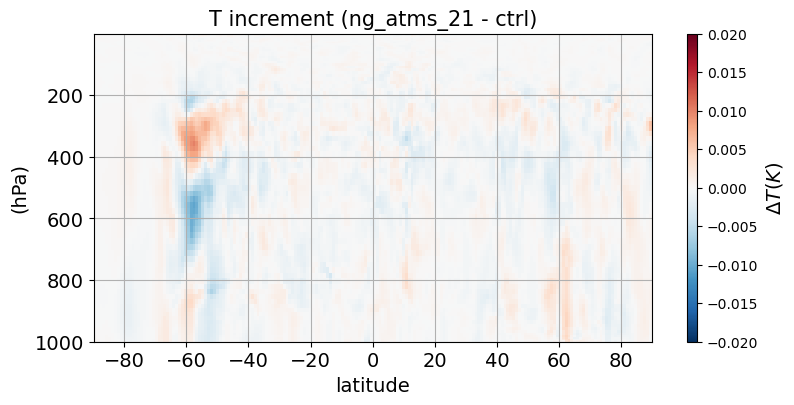

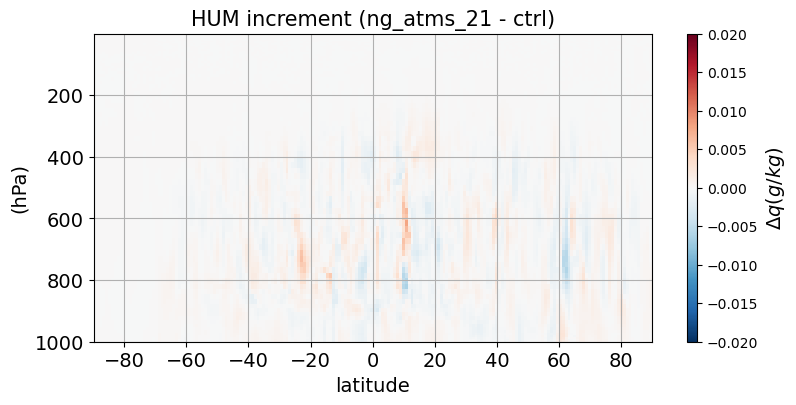

In [131]:
### zonal mean plot
pltvarss = ['T','HUM']

for pltvars in pltvarss:
    zonal_mean_vars = {};

    for exp in expids:
        if pltvars == 'T':
            zonal_mean_vars[exp] = np.mean(T[exp],axis=2)
            v_min = -0.02
            v_max =  0.02
        elif pltvars == 'HUM':
            zonal_mean_vars[exp] = np.mean(HUM[exp],axis=2)*1e3
            v_min = -0.02
            v_max =  0.02

    lats, levs = np.meshgrid(lat, pfull)

    #plt_cont_var = zonal_mean_vars[expref]
    plt_cont_var=zonal_mean_vars[exptest]-zonal_mean_vars[expref]

    fig, ax = plt.subplots(figsize=(9,4))
    contour1=ax.pcolormesh(lats, levs, plt_cont_var, cmap='RdBu_r', vmin=v_min, vmax=v_max)

    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel('latitude',fontsize=14)
    ax.set_ylabel('(hPa)',fontsize=14)
    ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
    ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
    ax.grid(True)
    ax.set_title(f'{pltvars} increment ({exptest} - {expref})',fontsize=15)
    #ax.set_title(f'{pltvars} increment ({expref})',fontsize=15)

    cbar = fig.colorbar(contour1,location='right',aspect=30)
    if pltvars == 'T':
        cbar.set_label('$\Delta T(K)$', fontsize=14)
    elif pltvars == 'HUM':
        cbar.set_label('$\Delta q (g/kg)$', fontsize=14)

#plt.savefig(f'{pltvars}_inc_{exptest}_minus_{expref}.png', dpi=200, bbox_inches='tight')

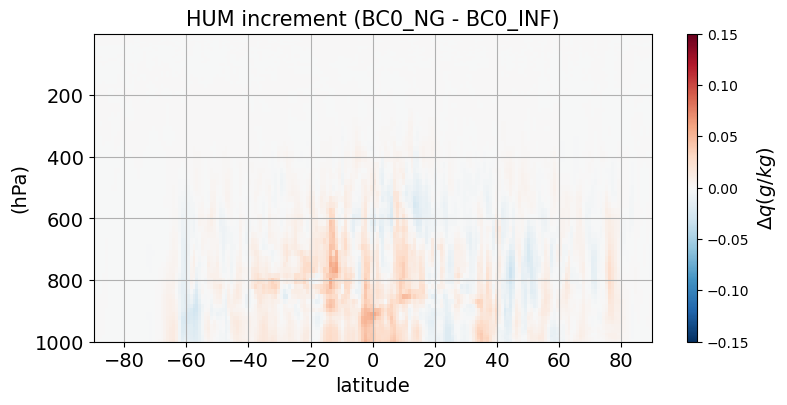

In [14]:
### zonal mean plot
pltvars = 'HUM'

if pltvars == 'T':
    plt_levs = np.linspace(-0.1, 0.1, 21)
elif pltvars == 'HUM':
    plt_levs = np.linspace(-9, 9, 21)*1e-2

zonal_mean_vars = {};

for exp in expids:
    if pltvars == 'T':
        zonal_mean_vars[exp] = np.mean(T[exp],axis=2)
        v_min = -0.15
        v_max =  0.15
    elif pltvars == 'HUM':
        zonal_mean_vars[exp] = np.mean(HUM[exp],axis=2)*1e3
        v_min = -0.15
        v_max =  0.15
        
lats, levs = np.meshgrid(lat, pfull)

#plt_cont_var = zonal_mean_vars[expref]
plt_cont_var=zonal_mean_vars[exptest]-zonal_mean_vars[expref]

fig, ax = plt.subplots(figsize=(9,4))
#contour1=ax.contourf(lats, levs, plt_cont_var, cmap='RdBu_r', levels=plt_levs)
contour1=ax.pcolormesh(lats, levs, plt_cont_var, cmap='RdBu_r', vmin=v_min, vmax=v_max)

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('latitude',fontsize=14)
ax.set_ylabel('(hPa)',fontsize=14)
ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
ax.grid(True)
ax.set_title(f'{pltvars} increment ({exptest} - {expref})',fontsize=15)
#ax.set_title(f'{pltvars} increment ({expref})',fontsize=15)

cbar = fig.colorbar(contour1,location='right',aspect=30)
if pltvars == 'T':
    cbar.set_label('$\Delta T(K)$', fontsize=14)
elif pltvars == 'HUM':
    cbar.set_label('$\Delta q (g/kg)$', fontsize=14)

plt.savefig(f'{pltvars}_inc_{exptest}_minus_{expref}.png', dpi=200, bbox_inches='tight')


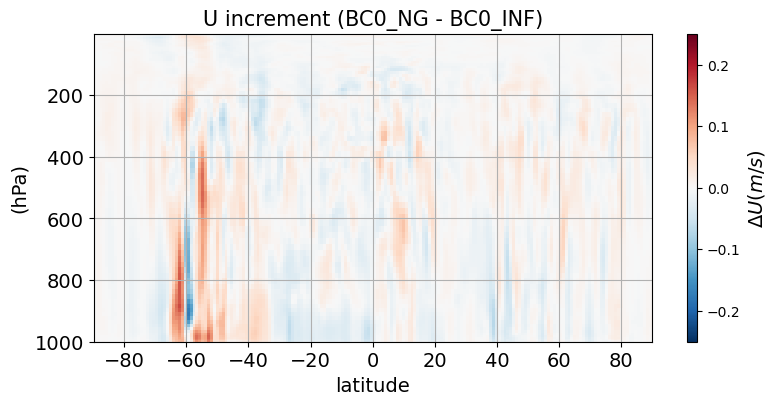

In [15]:
### zonal mean plot
pltvars = 'U'

zonal_mean_vars = {};

for exp in expids:
    if pltvars == 'T':
        zonal_mean_vars[exp] = np.mean(T[exp],axis=2)
        v_min = -0.15
        v_max =  0.15
    elif pltvars == 'HUM':
        zonal_mean_vars[exp] = np.mean(HUM[exp],axis=2)*1e3
        v_min = -0.15
        v_max =  0.15
    elif pltvars == 'U':
        zonal_mean_vars[exp] = np.mean(U[exp],axis=2)
        v_min = -0.25
        v_max =  0.25
        
lats, levs = np.meshgrid(lat, pfull)

#plt_cont_var = zonal_mean_vars[expref]
plt_cont_var=zonal_mean_vars[exptest]-zonal_mean_vars[expref]

fig, ax = plt.subplots(figsize=(9,4))
#contour1=ax.contourf(lats, levs, plt_cont_var, cmap='RdBu_r', levels=plt_levs)
contour1=ax.pcolormesh(lats, levs, plt_cont_var, cmap='RdBu_r', vmin=v_min, vmax=v_max)

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('latitude',fontsize=14)
ax.set_ylabel('(hPa)',fontsize=14)
ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
ax.grid(True)
ax.set_title(f'{pltvars} increment ({exptest} - {expref})',fontsize=15)
#ax.set_title(f'{pltvars} increment ({expref})',fontsize=15)

cbar = fig.colorbar(contour1,location='right',aspect=30)
if pltvars == 'T':
    cbar.set_label('$\Delta T(K)$', fontsize=14)
elif pltvars == 'HUM':
    cbar.set_label('$\Delta q (g/kg)$', fontsize=14)
elif pltvars == 'U':
    cbar.set_label('$\Delta U (m/s)$', fontsize=14)
    
plt.savefig(f'{pltvars}_inc_{exptest}_minus_{expref}.png', dpi=200, bbox_inches='tight')

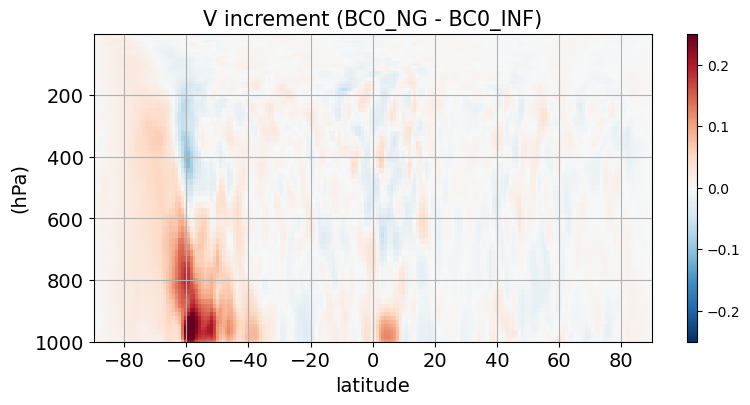

In [16]:
### zonal mean plot
pltvars = 'V'

zonal_mean_vars = {};

for exp in expids:
    if pltvars == 'T':
        zonal_mean_vars[exp] = np.mean(T[exp],axis=2)
        v_min = -0.15
        v_max =  0.15
    elif pltvars == 'HUM':
        zonal_mean_vars[exp] = np.mean(HUM[exp],axis=2)*1e3
        v_min = -0.15
        v_max =  0.15
    elif pltvars == 'V':
        zonal_mean_vars[exp] = np.mean(V[exp],axis=2)
        v_min = -0.25
        v_max =  0.25
        
lats, levs = np.meshgrid(lat, pfull)

#plt_cont_var = zonal_mean_vars[expref]
plt_cont_var=zonal_mean_vars[exptest]-zonal_mean_vars[expref]

fig, ax = plt.subplots(figsize=(9,4))
#contour1=ax.contourf(lats, levs, plt_cont_var, cmap='RdBu_r', levels=plt_levs)
contour1=ax.pcolormesh(lats, levs, plt_cont_var, cmap='RdBu_r', vmin=v_min, vmax=v_max)

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('latitude',fontsize=14)
ax.set_ylabel('(hPa)',fontsize=14)
ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
ax.grid(True)
ax.set_title(f'{pltvars} increment ({exptest} - {expref})',fontsize=15)
#ax.set_title(f'{pltvars} increment ({expref})',fontsize=15)

cbar = fig.colorbar(contour1,location='right',aspect=30)
if pltvars == 'T':
    cbar.set_label('$\Delta T(K)$', fontsize=14)
elif pltvars == 'HUM':
    cbar.set_label('$\Delta q (g/kg)$', fontsize=14)
elif pltvars == 'U':
    cbar.set_label('$\Delta V (m/s)$', fontsize=14)
    
plt.savefig(f'{pltvars}_inc_{exptest}_minus_{expref}.png', dpi=200, bbox_inches='tight')

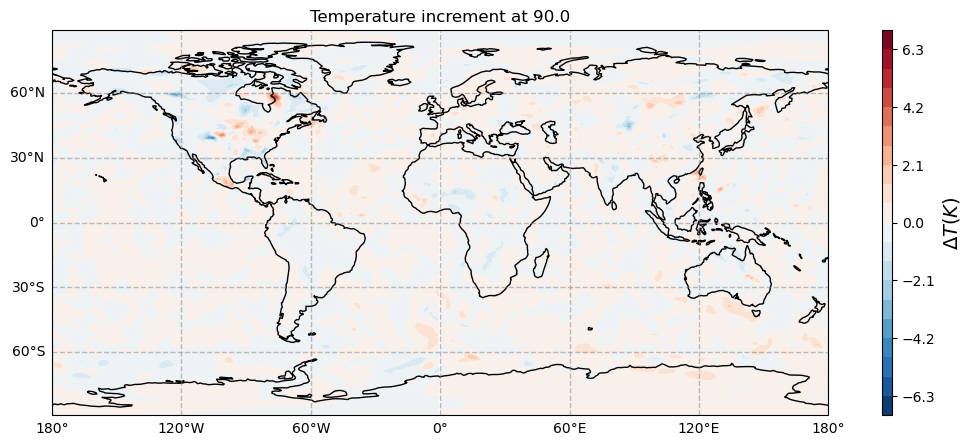

In [6]:
plt_levs = np.linspace(-7,7,21)

fig = plt.figure(figsize=(14,5))

# define the subplots
ax = fig.add_subplot(projection=ccrs.PlateCarree())  # Add subplot at position 1

i=89
# ax1: CTRL bias
ax.coastlines()
plt_vars = T['CTRL'][i,:,:]
contour1 = ax.contourf(lon, lat, plt_vars, cmap='RdBu_r', levels=plt_levs)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude') 
ax.set_title(f'Temperature increment at {lev[i]}')
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side

# set colorbar
cbar = fig.colorbar(contour1,location='right',aspect=40)
#cbar.set_ticks([-6,-4,-2,0,2,4,6])  # Set the tick positions
#cbar.set_ticklabels(['Low', 'Medium', 'Medium-High', 'High', 'Very High'])  # Set the tick labels
cbar.set_label('$\Delta T(K)$', fontsize=14)

TypeError: unhashable type: 'slice'

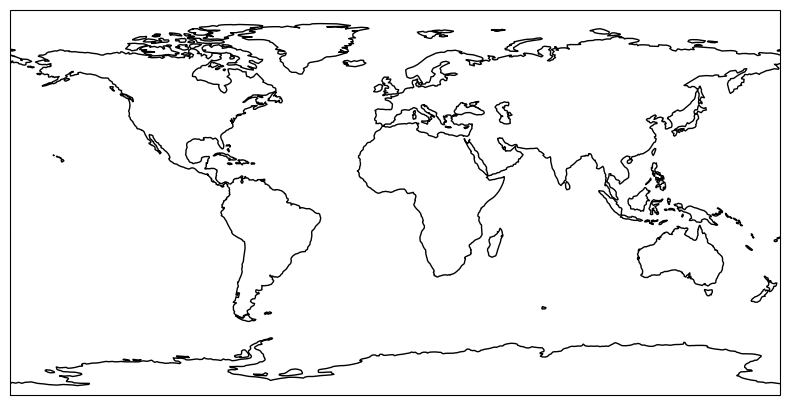

In [7]:
# plot the increment in each level

for i in (10,20,30,40,50,60,70,80,90):
#for i in range(len(lev)):
    plt_levs = np.linspace(-7,7,21)*1e-9

    fig = plt.figure(figsize=(14,5))

    # define the subplots
    ax = fig.add_subplot(projection=ccrs.PlateCarree())  # Add subplot at position 1

    # ax1: CTRL bias
    ax.coastlines()
    plt_vars = LW[i,:,:]
    contour1 = ax.contourf(lon, lat, plt_vars, cmap='RdBu_r', levels=plt_levs)
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude') 
    ax.set_title(f'Temperature increment at {lev[i]}')
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side

    # set colorbar
    cbar = fig.colorbar(contour1,location='right',aspect=40)
    #cbar.set_ticks([-6,-4,-2,0,2,4,6])  # Set the tick positions
    #cbar.set_ticklabels(['Low', 'Medium', 'Medium-High', 'High', 'Very High'])  # Set the tick labels
    cbar.set_label('$\Delta T(K)$', fontsize=14)

In [50]:
plt_levs

array([-7.0e-06, -6.3e-06, -5.6e-06, -4.9e-06, -4.2e-06, -3.5e-06,
       -2.8e-06, -2.1e-06, -1.4e-06, -7.0e-07,  0.0e+00,  7.0e-07,
        1.4e-06,  2.1e-06,  2.8e-06,  3.5e-06,  4.2e-06,  4.9e-06,
        5.6e-06,  6.3e-06,  7.0e-06])

In [71]:
np.max(LW)

0.0